# РостАгро: Прогноз стоимости агропродукции (2024–2030)

## 1. Описание задачи

Построить прогноз по стоимости ($/mt) на период 2024–2030 гг. для четырёх позиций:
- Soybeans
- Phosphate rock
- Sunflower oil
- Wheat

Модель: Holt-Winters Exponential Smoothing (с учётом тренда, без сезонности).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
DATA_PATH = "../data/clean_dataset.xlsx"

df = pd.read_excel(DATA_PATH, header=[0, 1])

df.columns = df.columns.get_level_values(0)

target_cols = [
    'Year',
    'Soybeans',
    'Phosphate rock',
    'Sunflower oil',
    'Wheat, US SRW'
]
df = df[target_cols]

for col in target_cols[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['Year'] = df['Year'].astype(int)
df = df.dropna().reset_index(drop=True)


In [3]:
df.index = pd.to_datetime(df['Year'], format='%Y')
df.index.freq = 'YS'

products = target_cols[1:]


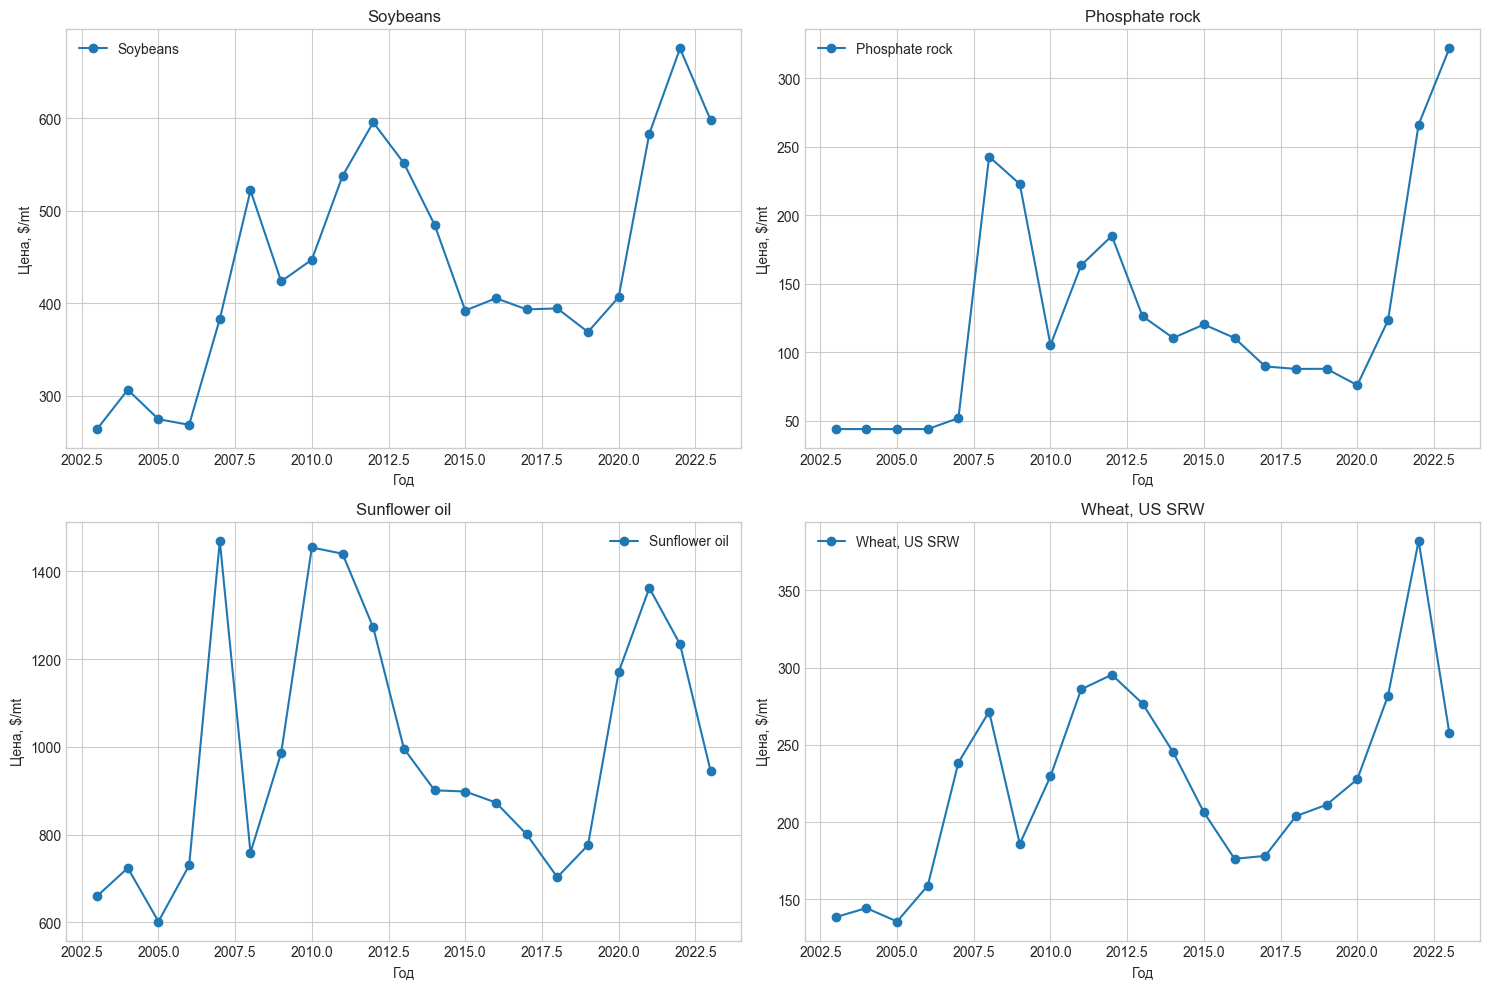

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, product in zip(axs.flat, products):
    ax.plot(df.index.year, df[product], marker='o', label=product)
    ax.set_title(product)
    ax.set_xlabel("Год")
    ax.set_ylabel("Цена, $/mt")
    ax.legend()
plt.tight_layout()
plt.show()


In [5]:
forecast_years = np.arange(df.index.year.max() + 1, 2031)
forecast_index = pd.to_datetime(forecast_years, format='%Y')

results = {}
for product in products:
    model = ExponentialSmoothing(df[product], trend='add', seasonal=None, initialization_method="estimated")
    fit = model.fit()
    forecast = fit.forecast(len(forecast_years))
    results[product] = {
        "fitted_model": fit,
        "forecast": forecast,
        "history": df[product]
    }


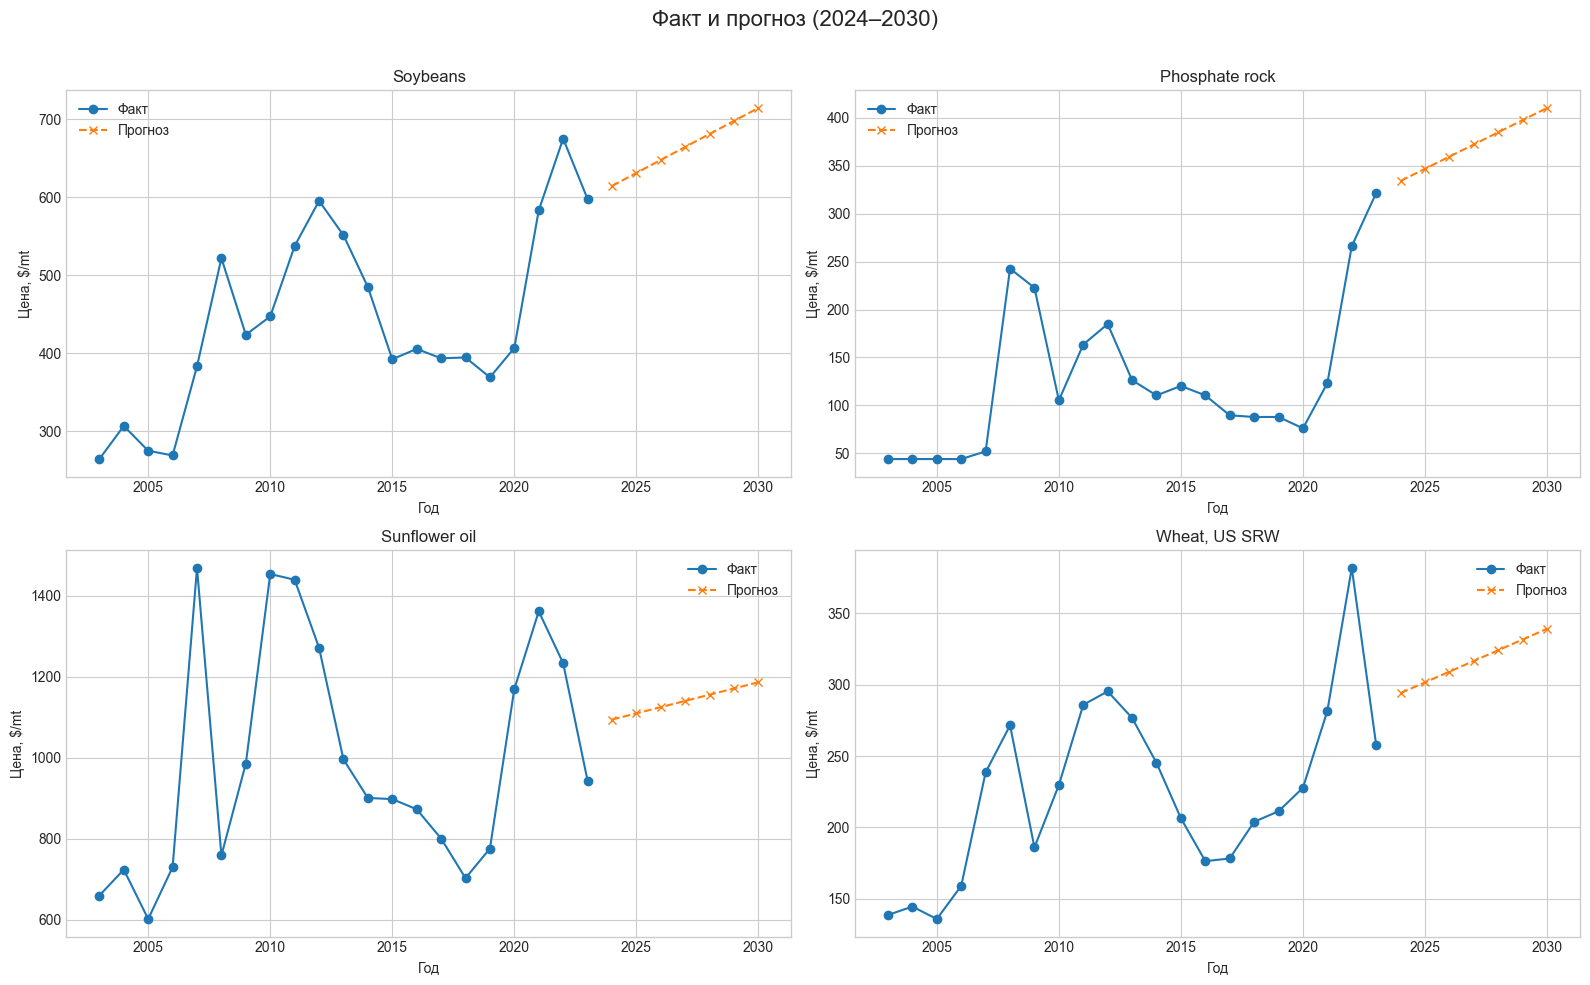

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for ax, product in zip(axs.flat, products):
    ax.plot(df.index.year, df[product], label='Факт', marker='o')
    ax.plot(forecast_years, results[product]['forecast'], label='Прогноз', marker='x', linestyle='--')
    ax.set_title(product)
    ax.set_xlabel("Год")
    ax.set_ylabel("Цена, $/mt")
    ax.legend()
plt.suptitle("Факт и прогноз (2024–2030)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [7]:
forecast_df = pd.DataFrame({"Year": forecast_years})
for product in products:
    forecast_df[product] = results[product]['forecast'].values

forecast_df.to_excel("../data/forecast_2024_2030.xlsx", index=False)
print(forecast_df.head())


   Year    Soybeans  Phosphate rock  Sunflower oil  Wheat, US SRW
0  2024  614.593496      334.242688    1094.541497     294.160710
1  2025  631.288658      346.935967    1109.908475     301.673679
2  2026  647.983819      359.629245    1125.275452     309.186648
3  2027  664.678981      372.322523    1140.642430     316.699618
4  2028  681.374143      385.015802    1156.009407     324.212587


In [36]:
print(df.describe())


              Year    Soybeans  Phosphate rock  Sunflower oil  Wheat, US SRW
count    21.000000   21.000000       21.000000      21.000000      21.000000
mean   2013.000000  441.732323      127.022893     988.249585     225.321972
std       6.204837  118.020971       79.312073     283.186350      61.800685
min    2003.000000  264.000000       44.000000     602.000000     135.720017
25%    2008.000000  383.103333       76.051667     759.000000     178.182610
50%    2013.000000  406.639842      110.456250     900.950000     227.738798
75%    2018.000000  537.519167      163.552083    1233.800000     271.520328
max    2023.000000  675.395000      321.659091    1469.000000     381.918430
